<a href="https://colab.research.google.com/github/romigiorgi/python-ciencia-datos/blob/main/Romina_Giorgi_TRABAJO_INTEGRADOR_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***TRABAJO INTEGRADOR I- ***
DATOS BASADOS EN INFORMACIÓN PÚBLICA EN ARGENTINA




---
## **Acceso a los diferentes dataset y visualizacion**

#Los dataset podran ser descargado del siguiente [enlace de drive](https://drive.google.com/drive/folders/1J-R6fricR7D1uf9g_Cg8gbIMajCe-eYw?usp=sharing). en algunos casos los datase contiene información de diferentes periodos de tiempo y etiquetas de las variables con nomenclatura específica. Para tener referencia de los datos de cada variables de la base de datos consultar en los siguientes enlaces según el dataset elegido.



|    | Tema | Nombre del archivo | Enlace |
|---|    ---   |         ---         |   ---  |
1   | .... | spam.csv  |  ....   |
2   | supermercados| ventas-supermercados-2.csv  | [dataset de supermercados](https://www.datos.gob.ar/dataset/sspm_455/archivo/sspm_455.1) |
3   | Mercado Central de Bs As |precios-mercadocentral.csv| [dataset de mercado](https://datos.gob.ar/ar/dataset/agroindustria-frutas-hortalizas---precios-mayoristas/archivo/agroindustria_6dce1e87-7988-4eaf-b0e1-b3abbb3964da) |

#Apellido, Nombre, DNI, email de todos los integrantes del grupo:
Giorgi, Romina Paola

32767651

rominapgiorgi@hotmail.com

Individual

#Redactar en formato resumen la problematica planteado e interes en el análisis del dataset elegido, el impacto que puede llevar a futuro analizar o cruzar información sobre dichas variables ,y cual sería a priori, el modelo a resulado que usted quisiera encontrar en funciones de determinadas condiciones. Esto deberá ser detallado en forma breve a modo de introducción


Quiero analisar los datos del Tomate Cherry y ver como varia su precio a lo largo del tiempo. Al ser datos continuos voy a utilizar el modelo de *Regresión Lineal* para llevar a cabo dicho analisis. Con la opción de poder predecir precios en el futuro.
Por otro lado, quiero analisar todos los precios del dataset y separarlos entre Baratos y Caros. Al categorizarlos voy a utilizar el modelo de *Regresión Logistica*. Quiero poder marcar una clara Frontera de Decisión.También quiero que se pueda predecir si un precio es Barato o Caro. Todo esto para que facilite la toma de decisiones en compras a futuro.

_________________________________________________________________
_________________________________________________________________
_________________________________________________________________
_________________________________________________________________
##1- Ingrese el DATA SET

In [3]:
#Subir archivo en la carpetita que aparece a la izquierda del colab, luego copiar la ruta
#y subirlo con las librerias necesarias

import numpy as np
import pandas as pd
csv_path = '/content/precios-mercadocentral.csv'
df_mercadocentral = pd.read_csv(csv_path, encoding='latin-1')

##2- Aplicar PROCESO de ANÁLISIS EXPLORATORIO DE LOS DATOS (Algunas funciones comúnes que puedes aplicar: .head .info .describe etc).

In [4]:
df_mercadocentral.head(10)

,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda
0,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Anana,Perola,Brasil,1.22,USD,Dolares
1,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Banana,Cavdich,Ecuador,0.53,USD,Dolares
2,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Pomelo,Star Ruby,Argentina,0.86,USD,Dolares
3,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Limón,Eureka,Argentina,1.52,USD,Dolares
4,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Manzana,Granny Smith,Argentina,1.84,USD,Dolares
5,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Manzana,Red Delicius,Argentina,1.46,USD,Dolares
6,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Mandarina,Okitzu,Argentina,0.81,USD,Dolares
7,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Melón,Rocio Miel,Argentina,0.85,USD,Dolares
8,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Naranja,Valenciana,Argentina,0.38,USD,Dolares
9,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Pera,Williams,Argentina,0.83,USD,Dolares


In [5]:
df_mercadocentral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pais_id        828 non-null    int64  
 1   pais           828 non-null    object 
 2   mercado        828 non-null    object 
 3   año            828 non-null    int64  
 4   mes            828 non-null    object 
 5   producto       828 non-null    object 
 6   variedad       828 non-null    object 
 7   origen         828 non-null    object 
 8   precio_usd_kg  767 non-null    float64
 9   moneda_cod     828 non-null    object 
 10  moneda         828 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 71.3+ KB


In [6]:
df_mercadocentral.tail()

,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda
823,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Repollo,s/especificar,s/especificar,0.36,USD,Dolares
824,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Tomate,s/especificar,s/especificar,1.15,USD,Dolares
825,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Zanahoria,s/especificar,s/especificar,0.29,USD,Dolares
826,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Zapallito,s/especificar,s/especificar,1.01,USD,Dolares
827,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Zapallo,s/especificar,s/especificar,0.32,USD,Dolares


In [7]:
df_mercadocentral.describe()

,pais_id,año,precio_usd_kg
count,828.0,828.000000,767.000000
mean,32.0,2017.376812,1.262360
std,0.0,0.484880,1.437011
min,32.0,2017.000000,0.000000
25%,32.0,2017.000000,0.470000
50%,32.0,2017.000000,0.860000
75%,32.0,2018.000000,1.460000
max,32.0,2018.000000,11.230000


##3- Aplicar PROCESO DE LIMPIEZA

In [164]:
#Apliqué procesos de limpieza unos pasos más adelante

##4- Aplicar PROCESO para DEFINIR tu X e Y para APLICAR REGRESION LINEAL Y LOGISTICA segun el DATA SET a las variables que consideres adecuadas. RECUERDA ESTANDARIZAR LAS VARIABLES PARA CORRELACIÓN LOGÍSTICA.

In [8]:
#Quiero saber si se repiten los productos y cuantas veces
cantidad_productos = df_mercadocentral['producto'].nunique()
print("Cantidad de productos:", cantidad_productos)

Cantidad de productos: 42


In [9]:
#Quiero saber frecuencia de cada producto
frecuencia_productos = df_mercadocentral['producto'].value_counts()
print("Frecuencia de productos:", frecuencia_productos)

Frecuencia de productos: Tomate       44
Manzana      32
Anana        20
Pepino       20
Brocoli      20
Cebolla      20
Chaucha      20
Choclo       20
Epinaca      20
Lechuga      20
Papa         20
Pimiento     20
Perejil      20
Banana       20
Radicheta    20
Remolacha    20
Repollo      20
Zanahoria    20
Zapallito    20
Zapallo      20
Berenjena    20
Batata       20
Arveja       20
Apio         20
Limón        20
Mandarina    20
Melón        20
Naranja      20
Pera         20
Uva          20
Pomelo       20
Durazno      20
Frutilla     20
Kiwi         20
Frambuesa    20
Acelga       20
Ajo          20
Albahaca     20
Ciruela      12
PALTA         8
Palta         8
Cereza        4
Name: producto, dtype: int64


In [10]:
nuevo_df_tomate = df_mercadocentral[df_mercadocentral['producto'] == 'Tomate']
print(nuevo_df_tomate.head(10))


     pais_id       pais                          mercado   año      mes  \
37        32  Argentina  Mercado Central de Buenos Aires  2017    Enero   
38        32  Argentina  Mercado Central de Buenos Aires  2017    Enero   
39        32  Argentina  Mercado Central de Buenos Aires  2017    Enero   
80        32  Argentina  Mercado Central de Buenos Aires  2017  Febrero   
81        32  Argentina  Mercado Central de Buenos Aires  2017  Febrero   
82        32  Argentina  Mercado Central de Buenos Aires  2017  Febrero   
123       32  Argentina  Mercado Central de Buenos Aires  2017    Marzo   
124       32  Argentina  Mercado Central de Buenos Aires  2017    Marzo   
125       32  Argentina  Mercado Central de Buenos Aires  2017    Marzo   
166       32  Argentina  Mercado Central de Buenos Aires  2017    Abril   

    producto variedad     origen  precio_usd_kg moneda_cod   moneda  
37    Tomate   Cherry  Argentina           1.02        USD  Dolares  
38    Tomate   Perita  Argentina  

In [11]:
#Quiero saber frecuencia de cada variedad
frecuencia_tomate_variedad = nuevo_df_tomate['variedad'].value_counts()
print("Frecuencia de tomate variedad:", frecuencia_tomate_variedad)

Frecuencia de tomate variedad: Cherry           12
Perita           12
Redondo          12
s/especificar     8
Name: variedad, dtype: int64


In [12]:
#Creo un nuevo df de Tomate Cherry
nuevo_df_tomate_cherry = nuevo_df_tomate[nuevo_df_tomate['variedad'] == 'Cherry']
print(nuevo_df_tomate_cherry.head(10))

     pais_id       pais                          mercado   año         mes  \
37        32  Argentina  Mercado Central de Buenos Aires  2017       Enero   
80        32  Argentina  Mercado Central de Buenos Aires  2017     Febrero   
123       32  Argentina  Mercado Central de Buenos Aires  2017       Marzo   
166       32  Argentina  Mercado Central de Buenos Aires  2017       Abril   
209       32  Argentina  Mercado Central de Buenos Aires  2017        Mayo   
252       32  Argentina  Mercado Central de Buenos Aires  2017       Junio   
295       32  Argentina  Mercado Central de Buenos Aires  2017       Julio   
338       32  Argentina  Mercado Central de Buenos Aires  2017      Agosto   
381       32  Argentina  Mercado Central de Buenos Aires  2017  Septiembre   
424       32  Argentina  Mercado Central de Buenos Aires  2017     Octubre   

    producto variedad     origen  precio_usd_kg moneda_cod   moneda  
37    Tomate   Cherry  Argentina           1.02        USD  Dolares  
8

In [13]:
nuevo_df_tomate_cherry['mes'] = nuevo_df_tomate_cherry['mes'].map({'Enero': 0.0, 'Febrero': 0.076, 'Marzo': 0.152, 'Abril': 0.228, 'Mayo': 0.304, 'Junio': 0.38, 'Julio': 0.456, 'Agosto': 0.532,'Septiembre': 0.608, 'Octubre': 0.684, 'Noviembre': 0.76, 'Diciembre': 0.836})
nuevo_df_tomate_cherry['añomes'] = (nuevo_df_tomate_cherry['año'] + nuevo_df_tomate_cherry['mes'])
print(nuevo_df_tomate_cherry.head(10))
print(nuevo_df_tomate_cherry.tail(10))

     pais_id       pais                          mercado   año    mes  \
37        32  Argentina  Mercado Central de Buenos Aires  2017  0.000   
80        32  Argentina  Mercado Central de Buenos Aires  2017  0.076   
123       32  Argentina  Mercado Central de Buenos Aires  2017  0.152   
166       32  Argentina  Mercado Central de Buenos Aires  2017  0.228   
209       32  Argentina  Mercado Central de Buenos Aires  2017  0.304   
252       32  Argentina  Mercado Central de Buenos Aires  2017  0.380   
295       32  Argentina  Mercado Central de Buenos Aires  2017  0.456   
338       32  Argentina  Mercado Central de Buenos Aires  2017  0.532   
381       32  Argentina  Mercado Central de Buenos Aires  2017  0.608   
424       32  Argentina  Mercado Central de Buenos Aires  2017  0.684   

    producto variedad     origen  precio_usd_kg moneda_cod   moneda    añomes  
37    Tomate   Cherry  Argentina           1.02        USD  Dolares  2017.000  
80    Tomate   Cherry  Argentina    

<ipython-input-13-e2726669ece0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_df_tomate_cherry['mes'] = nuevo_df_tomate_cherry['mes'].map({'Enero': 0.0, 'Febrero': 0.076, 'Marzo': 0.152, 'Abril': 0.228, 'Mayo': 0.304, 'Junio': 0.38, 'Julio': 0.456, 'Agosto': 0.532,'Septiembre': 0.608, 'Octubre': 0.684, 'Noviembre': 0.76, 'Diciembre': 0.836})
<ipython-input-13-e2726669ece0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_df_tomate_cherry['añomes'] = (nuevo_df_tomate_cherry['año'] + nuevo_df_t

In [14]:
#Me marcaba un error porque habia un valor en 0
nuevo_df_tomate_cherry = nuevo_df_tomate_cherry.dropna(subset=['precio_usd_kg'])

In [157]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

precio_tomate_cherry = nuevo_df_tomate_cherry['precio_usd_kg']
añomes_tomate_cherry = nuevo_df_tomate_cherry['añomes']
añomes_tomate_cherry_np = np.array(añomes_tomate_cherry)
añomes_tomate_cherry_np = añomes_tomate_cherry_np.reshape(-1, 1)

modelo = LinearRegression()
modelo.fit(añomes_tomate_cherry_np, precio_tomate_cherry)

nuevo_añomes_tomate_cherry = 2018.000  # Enero de 2018
nuevo_añomes_tomate_cherry = np.array([[nuevo_añomes_tomate_cherry]])
prediccion_precio_tomate_cherry = modelo.predict(nuevo_añomes_tomate_cherry)
print(f"Precio precio Tomate Cherry: u${precio_promedio:.2f}/kg")

Precio precio Tomate Cherry: u$1.26/kg


In [74]:
#MÉTRICAS: MSE
from sklearn.metrics import mean_squared_error

# Calcula la predicción para todo el conjunto de datos
prediccion_tomate_cherry = modelo.predict(añomes_tomate_cherry_np) #pero no lo hago sobre la predicción
#de los precios que hay en el df, no el nuevo

# Calcula el error cuadrático medio
mse = mean_squared_error(precio_tomate_cherry, prediccion_tomate_cherry)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 1.741590909090909


In [76]:
#MÉTRICAS: Calculo el coeficiente de determinación (R cuadrado)
r2 = r2_score(precio_tomate_cherry, prediccion_tomate_cherry)
print("Coeficiente de determinación (R cuadrado):", r2)

Coeficiente de determinación (R cuadrado): -2.288564053907279


<function matplotlib.pyplot.show(close=None, block=None)>

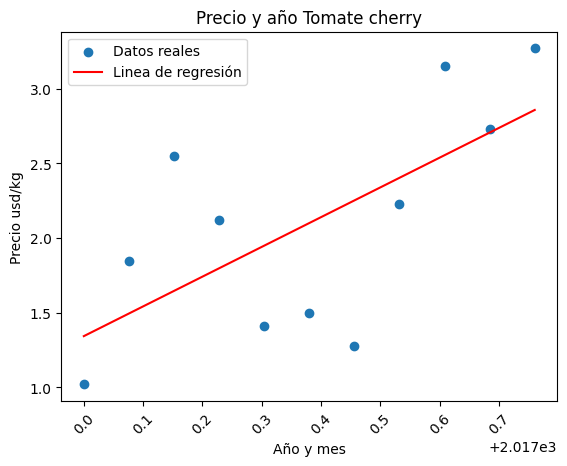

In [25]:
plt.scatter(añomes_tomate_cherry, precio_tomate_cherry, label="Datos reales")
plt.plot(añomes_tomate_cherry, modelo.predict(añomes_tomate_cherry_np), color= "red", label="Linea de regresión")
plt.legend()
plt.xlabel("Año y mes")
plt.xticks(rotation=45)
plt.ylabel("Precio usd/kg")
plt.title("Precio y año Tomate cherry")
plt.show

In [27]:
#REGRESIÓN LOGISTICA
#Quiero saber cual es el precio más barato
precio_mas_bajo = df_mercadocentral['precio_usd_kg'].min()
precio_mas_alto = df_mercadocentral['precio_usd_kg'].max()
precio_promedio = df_mercadocentral['precio_usd_kg'].mean()
print(f"Precio más bajo: u${precio_mas_bajo:.2f}")
print(f"Precio más alto: u${precio_mas_alto:.2f}")
print(f"Precio promedio: u${precio_promedio:.2f}")

Precio más bajo: u$0.00
Precio más alto: u$11.23
Precio promedio: u$1.26


In [28]:
#Hay una celda con precio 0, la busco
celdas_con_cero = df_mercadocentral.loc[df_mercadocentral['precio_usd_kg'] == 0]
print(celdas_con_cero)

     pais_id       pais                          mercado   año      mes  \
573       32  Argentina  Mercado Central de Buenos Aires  2018  Febrero   

    producto       variedad         origen  precio_usd_kg moneda_cod   moneda  
573     Apio  s/especificar  s/especificar            0.0        USD  Dolares  


In [29]:
df_mercadocentral = df_mercadocentral.drop(573)
print(df_mercadocentral)

     pais_id       pais                          mercado   año     mes  \
0         32  Argentina  Mercado Central de Buenos Aires  2017   Enero   
1         32  Argentina  Mercado Central de Buenos Aires  2017   Enero   
2         32  Argentina  Mercado Central de Buenos Aires  2017   Enero   
3         32  Argentina  Mercado Central de Buenos Aires  2017   Enero   
4         32  Argentina  Mercado Central de Buenos Aires  2017   Enero   
..       ...        ...                              ...   ...     ...   
823       32  Argentina  Mercado Central de Buenos Aires  2018  Agosto   
824       32  Argentina  Mercado Central de Buenos Aires  2018  Agosto   
825       32  Argentina  Mercado Central de Buenos Aires  2018  Agosto   
826       32  Argentina  Mercado Central de Buenos Aires  2018  Agosto   
827       32  Argentina  Mercado Central de Buenos Aires  2018  Agosto   

      producto       variedad         origen  precio_usd_kg moneda_cod  \
0        Anana         Perola        

In [30]:
#Vuelvo a buscar si el hay un minimo 0
precio_mas_bajo = df_mercadocentral['precio_usd_kg'].min()
precio_mas_alto = df_mercadocentral['precio_usd_kg'].max()
precio_promedio = df_mercadocentral['precio_usd_kg'].mean()
print(f"Precio más bajo: u${precio_mas_bajo:.2f}")
print(f"Precio más alto: u${precio_mas_alto:.2f}")
print(f"Precio promedio: u${precio_promedio:.2f}")

Precio más bajo: u$0.17
Precio más alto: u$11.23
Precio promedio: u$1.26


In [31]:
#Quiero agregar una columna. Si el precio es menor al promedio es 0 = barato. Si es mayor es 1 = caro
df_mercadocentral['barato_caro'] = df_mercadocentral.apply(lambda row: 1 if row['precio_usd_kg'] > precio_promedio else 0, axis=1)
print(df_mercadocentral)

     pais_id       pais                          mercado   año     mes  \
0         32  Argentina  Mercado Central de Buenos Aires  2017   Enero   
1         32  Argentina  Mercado Central de Buenos Aires  2017   Enero   
2         32  Argentina  Mercado Central de Buenos Aires  2017   Enero   
3         32  Argentina  Mercado Central de Buenos Aires  2017   Enero   
4         32  Argentina  Mercado Central de Buenos Aires  2017   Enero   
..       ...        ...                              ...   ...     ...   
823       32  Argentina  Mercado Central de Buenos Aires  2018  Agosto   
824       32  Argentina  Mercado Central de Buenos Aires  2018  Agosto   
825       32  Argentina  Mercado Central de Buenos Aires  2018  Agosto   
826       32  Argentina  Mercado Central de Buenos Aires  2018  Agosto   
827       32  Argentina  Mercado Central de Buenos Aires  2018  Agosto   

      producto       variedad         origen  precio_usd_kg moneda_cod  \
0        Anana         Perola        

In [39]:
# Eliminar las filas que contienen NaN en el DataFrame
df_mercadocentral = df_mercadocentral.dropna(subset=['precio_usd_kg', 'barato_caro'])

Ingrese precio producto: $0.1
El modelo predice: 0
Es barato
Precio promedio: u$1.26


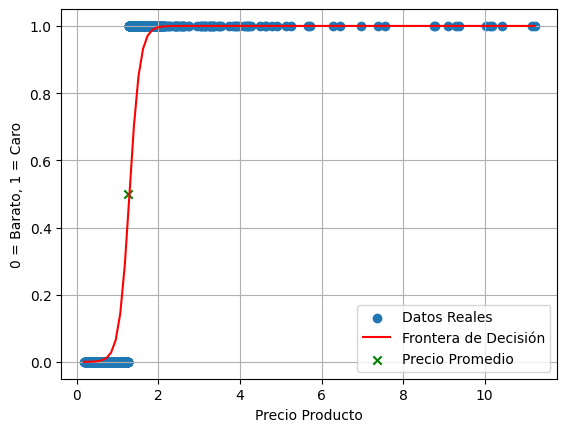

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

#Datos
precio_producto = df_mercadocentral['precio_usd_kg'].values
barato_caro = df_mercadocentral['barato_caro'].values
productos = df_mercadocentral['producto'].values

#Creo modelo de Regresión Logistica
modelo = LogisticRegression(solver="lbfgs")

#Entreno al modelo
modelo.fit(precio_producto.reshape(-1,1), barato_caro)

#Hago la prediccion
es_barato_caro = float(input("Ingrese precio producto: $"))
prediccion_barato_caro = modelo.predict(np.array([es_barato_caro]).reshape(1, -1))

#Imprimo la predicción
print(f"El modelo predice: {prediccion_barato_caro[0]}")

if prediccion_barato_caro == 0:
    print("Es barato")
else:
    print("Es caro")

#Precio que divide entre barato y caro
print(f"Precio promedio: u${precio_promedio:.2f}")

#Grafico
plt.scatter(precio_producto, barato_caro, label="Datos Reales")

x_vals = np.linspace(np.min(precio_producto), np.max(precio_producto), 100).reshape(-1, 1)
y_prob = modelo.predict_proba(x_vals)[:, 1]
plt.plot(x_vals, y_prob, color='red', label='Frontera de Decisión')

plt.scatter(precio_promedio, 0.5, color='green', marker='x', label="Precio Promedio")

plt.xlabel("Precio Producto")
plt.ylabel("0 = Barato, 1 = Caro")
plt.legend()
plt.grid(True)
plt.show()

##5- Aplicar alguna METRICAS de EVALUACION a los modelos anteriores y justificar la elección de dicha métrica.

In [151]:
#Apliqué métricas de evaluación para el caso de Regresión Lineal del precio del Tomate Cherry y me sale error.
#Busco el error y me dice que es porque no coincide el largo de los arrays
#Found input variables with inconsistent numbers of samples: [11, 1]

print(len(precio_tomate_cherry))
print(len(prediccion_precio_tomate_cherry))

11
1


In [162]:
#MÉTRICAS: Exactitud a Regresión Logistica
#Mismo error

accuracy = accuracy_score(precio_producto, prediccion_barato_caro)
print(f"Exactitud (Accuracy): {accuracy:.2f}")

ValueError: ignored

In [163]:
#Buscando una respuesta encuentro esto pero no llego a entenderlo:
accuracy2 = modelo.score(precio_producto.reshape(-1,1), barato_caro)
print(f"Exactitud (Accuracy): {accuracy:.2f}")

Exactitud (Accuracy): -73664875.89


##6- Sacar una conclusión en función de los resultados, errores, y predicciones.

***Regresión Lineal: Tomate Cherry.***

Es interesante porque se puede predecir el precio del producto y tenerlo en cuenta en la toma de decisiones futuras.
No lo llegué a hacer, pero también se puede llegar a analisar otras variables para tomar mejores decisiones. Como épocas del año y origen del producto.

***Regresión Logistica: Precio producto - Barato/Caro***

Al poder categorizar, uno puede poner un limite de precio por ejemplo, para decidir si comprar o no el producto.
Y al graficarlo se puede ver facilmente lo que queda de un lado y otro de la Línea de Decisión.


##7- Aplicar un MODELO DE APRENDIZAJE NO SUPERVISADO (k-means, arbol de  decisión, KNN) Con el resultado obtenido del algoritmo de agrupamiento elegido, agregar al dataset una columna con esta nueva variables del grupo al que pertenece cada dato.


In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

le = LabelEncoder()
df_mercado_central_encoded = df_mercadocentral.apply(le.fit_transform)

X = df_mercado_central_encoded.drop('precio_usd_kg', axis=1)
y = df_mercado_central_encoded['precio_usd_kg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(f"Precisión del árbol de decisión: {accuracy}")


Precisión del árbol de decisión: 0.032467532467532464


In [ ]:
#Precisión del árbol de decisión baja, porque está cercana a 0.

##8- Generar una conclusión con relación a como podría obtener mejores datos en este dataset, o que información considera importante que se podria evaluar para mejorar su predicción encontrada.

En el caso del Tomate Cherry (Regresión Lineal), si tuviese más datos históricos podriamos saber como evoluciona su precio a lo largo del año (y los años) y ver cual es el mejor momento para comprar para hacer un producto en particular, como por ejemplo conserva de tomate.
O hacer un analisis entre todas las variedades de tomates y ver cual es más barata o mantiene su precio continuo a lo largo del año.  


En el caso de los Precio producto - Barato/Caro (Regresión Logística), podria separar por productos. Y si por ejemplo supieran cual es el precio máximo que pueden pagar un producto para tener ganancia, podriamos ponerlo como Línea de Decisión y ver clara y facilmente cuales son redituables y cuales no.